<a href="https://colab.research.google.com/github/mrasw/classification/blob/main/Final_Project_Data_Mining_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
R = Ridge()
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DATA INPUT

In [ ]:
mydata = pd.read_csv('/content/drive/MyDrive/train.csv')
mydata

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
mydata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
mydata.describe().T.style.bar(subset=['mean'])\
                            .background_gradient(subset=['std'])\
                            .background_gradient(subset=['50%'])\
                            .background_gradient(subset=['max'])

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


## PREPROCESSING

In [ ]:
mydata = mydata.drop(columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen'])
mydata

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [ ]:
mydata.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [ ]:
#plt.figure(figsize=(16,16))
#for i, col in enumerate(mydata._get_numeric_data()):
    #plt.subplot(5,5,i+1)
    #sns.boxplot(mydata[col])
    #plt.tight_layout()

{'boxes': [<matplotlib.lines.Line2D at 0x7f952f1e2990>],
 'caps': [<matplotlib.lines.Line2D at 0x7f952f159090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f952f1d9dd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f952f159b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f952f1e2f50>,
  <matplotlib.lines.Line2D at 0x7f952f5d1890>]}

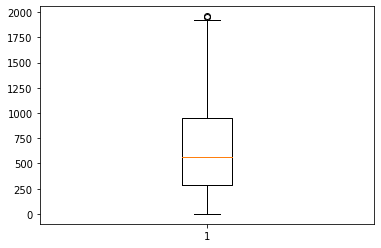

In [ ]:
# cek outlier untuk variabel 'px_height'
plt.boxplot(mydata['px_height'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f952eca9810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f952ecae890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f952ecb58d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f952ecb5390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f952eca9ed0>,
  <matplotlib.lines.Line2D at 0x7f952ecae350>]}

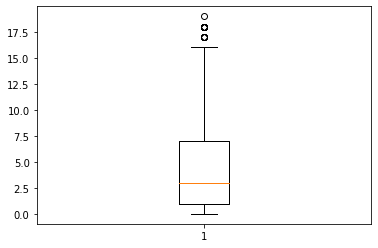

In [ ]:
# cek outlier untuk variabel 'fc'
plt.boxplot(mydata['fc'])

In [ ]:
# mendrop variabel yang memiliki outlier yaitu variabel 'fc' dan variabel 'px_height'
mydata = mydata.drop(columns = ['px_height', 'fc'])
mydata

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,7,0.6,188,2,2,756,2549,9,7,19,1
1,1021,0.5,53,0.7,136,3,6,1988,2631,17,3,7,2
2,563,0.5,41,0.9,145,5,6,1716,2603,11,2,9,2
3,615,2.5,10,0.8,131,6,9,1786,2769,16,8,11,2
4,1821,1.2,44,0.6,141,2,14,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,2,0.8,106,6,14,1890,668,13,4,19,0
1996,1965,2.6,39,0.2,187,4,3,1965,2032,11,10,16,2
1997,1911,0.9,36,0.7,108,8,3,1632,3057,9,1,5,3
1998,1512,0.9,46,0.1,145,5,5,670,869,18,10,19,0


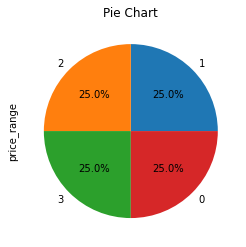

In [ ]:
price_category = mydata['price_range'].value_counts()

price_category.plot.pie(autopct='%1.1f%%',shadow=False)
plt.title('Pie Chart')
plt.show()

## FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = mydata.iloc[:,0:12] #independent variables
Y = mydata.iloc[:,-1]  #dependent variable(price range)

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame (fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
8             ram  931267.519053
0   battery_power   14129.866576
7        px_width    9810.586750
4       mobile_wt      95.972863
2      int_memory      89.839124
10           sc_w      16.480319
11      talk_time      13.236400
9            sc_h       9.614878
6              pc       9.186054
5         n_cores       9.097556


In [ ]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
X = mydata.iloc[:,0:12] #independent variables
Y = mydata.iloc[:,-1] #dependent variables (price range)
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07817282 0.04168407 0.04397802 0.0402926  0.04524066 0.04044457
 0.04250486 0.06863171 0.47158142 0.04240723 0.04198608 0.04307596]


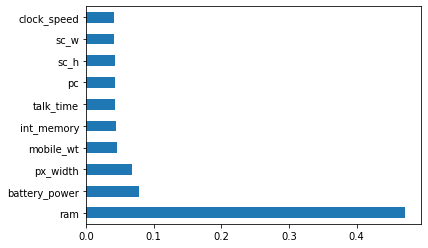

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

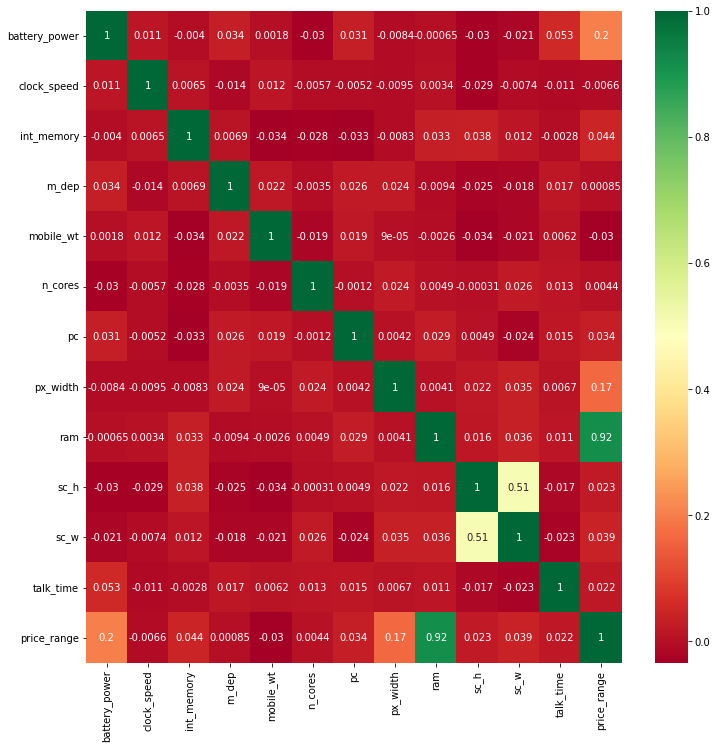

In [ ]:
# correlation matrix
X = mydata.iloc[:,0:12]  #independent variables
y = mydata.iloc[:,-1]    #dependent variables (price range)
#get correlations of each features in dataset
corrmat = mydata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(mydata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## DECISION TREE 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Definisi Y
y = mydata['price_range']

# Definisi X
X = mydata.drop(['price_range'], axis=1)
                 
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
#BUAT MODEL
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
y_test.shape

(600,)

In [ ]:
y_pred.shape

(600,)

In [ ]:
score = clf.score(X_test, y_pred)

# EVALUASI MODEL

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8033333333333333


**K Fold Decission Tree**

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Prepare the cross-validation procedure
cv1 = KFold(n_splits=10, random_state=100, shuffle=True)

# Train Decision Tree Classifier
score = clf.fit(X_train, y_train)

# Predict The Response for Test Dataset
y_pred = clf.predict(X_test)

# Evaluate The Model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv1, n_jobs=-1)

# Report The Performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.836 (0.021)


**Repeated Holdout Decision Tree**

In [ ]:
from sklearn.model_selection import ShuffleSplit

rs2 = ShuffleSplit(n_splits=10, random_state=100)

# Evaluate The Repeated Holdout
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=rs2, n_jobs=-1)

# Report The Performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.832 (0.023)


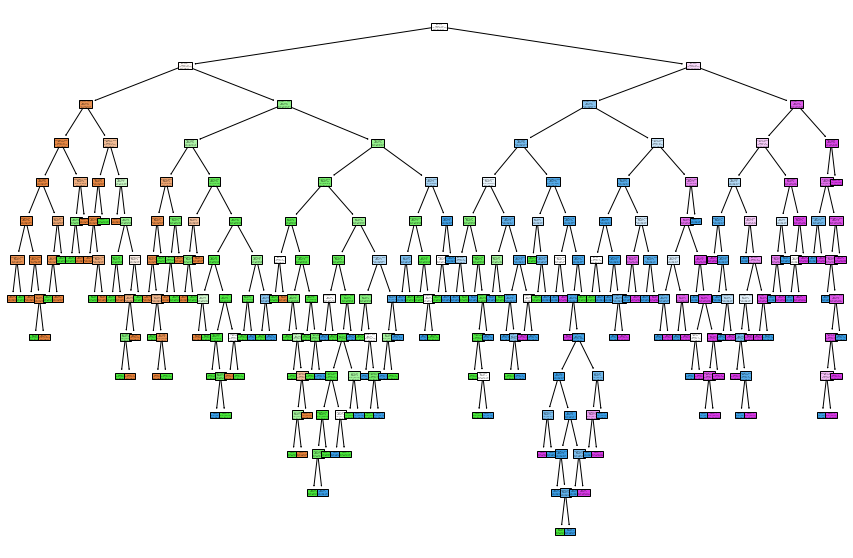

In [ ]:
# Visualization of Decision Tree
import matplotlib.pyplot as plt, seaborn as sns
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'],
                   filled=True)

**ROC AUC, Specificity, Sensitivity K FOLD Decision Tree**

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred_clf_kfold = cross_val_predict(clf, X, y, cv=cv1)
print(y_pred_clf_kfold.shape)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred_clf_kfold)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


# y_pred_clf_kfold = y_pred_clf_kfold.reshape(600,)

#use model to predict probability that given y value is 1
print(y_pred_clf_kfold.shape)
print(y_test.shape)

# y_pred_proba_cld = y_pred_proba_cld.reshape(600,1)
# y_test = y_test.reshape((600,1))
print(y_pred_clf_kfold.shape)


sensitivity_clf = round(recall_score(y, y_pred_clf_kfold, average='weighted'),2)
spesifisity_clf = np.round(tn / (tn+fp), 2)
roc_auc_clf = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr")
print("ROC AUC clf: ", roc_auc_clf,"Spesificity clf: ", spesifisity_clf, "Sensitivity: ", sensitivity_clf)

(2000,)
(2000,)
(600,)
(2000,)
ROC AUC clf:  0.8702712095749172 Spesificity clf:  [0.9  0.13 0.    nan] Sensitivity:  0.83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


**ROC AUC, Specificity, Sensitivity Repeated Holdout Decison Tree**

In [ ]:
sp = ShuffleSplit(n_splits=10, random_state=100)

for train_rh2, test_rh2 in sp.split(X):
  X_train_rh2, X_test_rh2 = X.iloc[train_rh2], X.iloc[test_rh2]
  y_train_rh2, y_test_rh2 = y.iloc[train_rh2], y.iloc[test_rh2]

# Train Random Forest Classifier
# score = clf.fit(X_train_rh, y_train_rh)

# Predict The Response for Test Dataset
y_pred_rh2 = clf.predict(X_test_rh2)


from sklearn.metrics import confusion_matrix
tn2, fp2, fn2, tp2 = confusion_matrix(y_test_rh2, y_pred_rh2)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


# y_pred_clf_kfold = y_pred_clf_kfold.reshape(600,)

#use model to predict probability that given y value is 1
print(y_pred_rh2)
print(y_test_rh2.shape)

# y_pred_proba_clf = y_pred_proba_clf.reshape(600,1)
# y_test = y_test.reshape((600,1))
print(y_pred_rh2.shape)


sensitivity_clf_rh = round(recall_score(y_test_rh2, y_pred_rh2, average='weighted'),2)
spesifisity_clf_rh = np.round(tn2 / (tn2+fp2), 2)
roc_auc_clf_rh = roc_auc_score(y_test_rh2, clf.predict_proba(X_test_rh2), multi_class="ovr")
print("ROC AUC clf: ", roc_auc_clf_rh,"Spesificity clf: ", spesifisity_clf_rh, "Sensitivity: ", sensitivity_clf_rh)




[0 2 1 2 1 0 2 1 0 2 0 0 0 1 3 0 2 2 2 3 0 0 3 2 2 3 0 0 1 1 3 0 2 2 3 3 2
 0 0 0 2 2 0 2 3 3 0 2 2 3 1 3 3 2 1 1 2 0 3 2 3 1 0 0 1 1 2 3 1 1 3 3 2 3
 1 1 1 0 1 1 1 0 2 1 3 0 1 0 0 2 2 1 0 3 0 0 3 0 1 3 3 1 0 2 0 0 3 3 2 1 0
 1 3 3 3 1 3 1 0 0 2 0 1 2 2 1 1 3 1 0 0 1 3 0 3 1 3 0 2 0 3 1 1 2 0 1 2 3
 3 2 1 3 0 2 1 2 3 0 0 0 1 1 0 2 2 1 1 3 2 1 2 2 2 0 3 1 2 1 0 3 0 0 2 0 1
 2 2 0 0 3 0 1 0 1 2 2 2 2 1 1]
(200,)
(200,)
ROC AUC clf:  0.9665321365512107 Spesificity clf:  [0.95 0.02  nan  nan] Sensitivity:  0.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


## NAIVE BAYES

In [ ]:
# Definisi Y
y = mydata['price_range']

# Definisi X
X = mydata.drop(['price_range'], axis=1)
                 
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
#BUAT MODEL
# Create Decision Tree classifer object
clf1 = GaussianNB()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

In [ ]:
score = clf1.score(X_test, y_pred)

# EVALUASI MODEL
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7816666666666666


**K Fold Naive Bayes**

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Prepare the cross-validation procedure
cv2 = KFold(n_splits=10, random_state=100, shuffle=True)

# Train Naive Bayes Classifier
score = clf1.fit(X_train, y_train)

# Predict The Response for Test Dataset
y_pred = clf1.predict(X_test)

# Evaluate The Model
scores = cross_val_score(clf1, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)

# Report The Performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.791 (0.026)


**Repeated Holdout Naive Bayes**

In [ ]:
from sklearn.model_selection import ShuffleSplit

rs1 = ShuffleSplit(n_splits=10, random_state=100)

# Evaluate The Repeated Holdout
scores = cross_val_score(clf1, X, y, scoring='accuracy', cv=rs1, n_jobs=-1)

# Report The Performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.795 (0.027)


**ROC AUC, Specificity, Sensitivity K FOLD Naive Bayes**

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred_clf1_kfold = cross_val_predict(clf1, X, y, cv=cv2)
print(y_pred_clf1_kfold.shape)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred_clf1_kfold)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


# y_pred_clf1_kfold = y_pred_clf1_kfold.reshape(600,)

#use model to predict probability that given y value is 1
print(y_pred_clf1_kfold.shape)
print(y_test.shape)

# y_pred_clf1_kfold = y_pred_clf1_kfold.reshape(600,1)
# y_test = y_test.reshape((600,1))
print(y_pred_clf1_kfold.shape)


sensitivity_clf1 = round(recall_score(y, y_pred_clf1_kfold, average='weighted'),2)
spesifisity_clf1 = np.round(tn / (tn+fp), 2)
roc_auc_clf1 = roc_auc_score(y_test, clf1.predict_proba(X_test), multi_class="ovr")
print("ROC AUC clf1: ", roc_auc_clf1,"Spesificity clf1: ", spesifisity_clf1, "Sensitivity: ", sensitivity_clf1)

(2000,)
(2000,)
(600,)
(2000,)
ROC AUC clf1:  0.9428264623447167 Spesificity clf1:  [0.88 0.14 0.    nan] Sensitivity:  0.79


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


**ROC AUC, Specificity, Sensitivity Repeated Holdout Naive Bayes**

In [ ]:
sp = ShuffleSplit(n_splits=10, random_state=100)

for train_rh1, test_rh1 in sp.split(X):
  X_train_rh1, X_test_rh1 = X.iloc[train_rh1], X.iloc[test_rh1]
  y_train_rh1, y_test_rh1 = y.iloc[train_rh1], y.iloc[test_rh1]

# Train Random Forest Classifier
# score = clf1.fit(X_train_rh, y_train_rh)

# Predict The Response for Test Dataset
y_pred_rh1 = clf1.predict(X_test_rh1)


from sklearn.metrics import confusion_matrix
tn2, fp2, fn2, tp2 = confusion_matrix(y_test_rh1, y_pred_rh1)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


# y_pred_clf1_kfold = y_pred_clf1_kfold.reshape(600,)

#use model to predict probability that given y value is 1
print(y_pred_rh1)
print(y_test_rh1.shape)

# y_pred_proba_clf1 = y_pred_proba_clf1.reshape(600,1)
# y_test = y_test.reshape((600,1))
print(y_pred_rh1.shape)


sensitivity_clf1_rh = round(recall_score(y_test_rh1, y_pred_rh1, average='weighted'),2)
spesifisity_clf1_rh = np.round(tn2 / (tn2+fp2), 2)
roc_auc_clf1_rh = roc_auc_score(y_test_rh1, clf1.predict_proba(X_test_rh1), multi_class="ovr")
print("ROC AUC clf1: ", roc_auc_clf1_rh,"Spesificity clf1: ", spesifisity_clf1_rh, "Sensitivity: ", sensitivity_clf1_rh)



[0 2 1 2 1 0 2 0 0 2 0 0 1 1 3 0 1 2 2 3 0 0 3 2 1 3 0 0 2 1 3 0 1 2 3 3 2
 0 0 0 2 2 0 2 3 3 0 2 3 3 1 2 3 2 0 1 1 0 3 2 3 1 1 1 1 1 2 3 0 2 3 3 2 3
 1 1 1 0 2 1 0 0 2 0 3 0 1 0 0 3 2 1 1 2 0 0 3 0 1 3 3 1 0 1 0 0 3 3 2 2 0
 1 3 3 3 1 3 1 0 0 2 1 1 2 2 1 1 2 1 0 1 1 3 0 3 1 3 0 2 1 3 1 2 2 0 2 2 2
 3 1 2 3 0 3 1 2 3 0 1 0 1 1 0 2 2 1 1 3 2 1 2 2 2 0 3 1 2 2 0 3 0 0 3 0 1
 2 2 1 0 3 0 2 0 1 2 2 1 3 2 1]
(200,)
(200,)
ROC AUC clf1:  0.9691021843868861 Spesificity clf1:  [0.92 0.13 0.    nan] Sensitivity:  0.83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


## RANDOM FOREST 

In [ ]:
# Definisi Y
y = mydata['price_range']

# Definisi X
X = mydata.drop(['price_range'], axis=1)
                 
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
#BUAT MODEL
# Create Decision Tree classifer object
clf2 = RandomForestClassifier(random_state = 100)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf2.predict(X_test)

In [ ]:
score = clf2.score(X_train, y_train)

# EVALUASI MODEL Accuracy Random Forest
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

clf2.fit(X_train, y_train)

y_pred_clf2 = y_pred


Accuracy: 0.8516666666666667


In [ ]:

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

#use model to predict probability that given y value is 1
y_pred_proba_clf2 = clf2.predict_proba(X_test)[::,1]

accuracy_clf2 = round(accuracy_score(y_test, y_pred_clf2), 2)
sensitivity_clf2 = round(recall_score(y_test, y_pred_clf2, average='weighted'),2)
spesificity_clf2 = round(tn / (tn+fp), 2)
roc_auc_clf2 = round(tn/(tn+tp), 2)

**K FOLD Random Forest**

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# Prepare the cross-validation procedure
cv3 = KFold(n_splits=10, random_state=100, shuffle=True)

# Train Random Forest Classifier
score = clf2.fit(X_train, y_train)

# Predict The Response for Test Dataset
y_pred = clf2.predict(X_test)

y_pred_clf2 = y_pred

# Evaluate The Model K FOld
scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=cv3, n_jobs=-1)

# Report The Performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))



Accuracy: 0.864 (0.029)


**Repeated K Fold**

In [ ]:

from sklearn.model_selection import KFold, RepeatedKFold

# Prepare the cross-validation procedure
rcv3 = RepeatedKFold(n_splits=10)

rcv3.split(X)

# Train Random Forest Classifier
score = clf2.fit(X_train, y_train)

# Predict The Response for Test Dataset
y_pred = clf2.predict(X_test)

y_pred_clf2 = y_pred

# Evaluate The Model K FOld
scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=rcv3, n_jobs=-1)

# Report The Performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.862 (0.022)


**Repeated Holdout Random Forest**

In [ ]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, random_state=100)

# Evaluate The Model Repeated Holdout
scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=rs)

# Report The Performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.868 (0.022)


In [ ]:
# scores.shape
y_pred_clf2.shape

(600,)

In [ ]:
print(cv3)
print(y.shape)

KFold(n_splits=10, random_state=100, shuffle=True)
(2000,)


**ROC AUC, Specificity, Sensitivity K FOLD Random Forest**



In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred_clf2_kfold = cross_val_predict(clf2, X, y, cv=cv3)
print(y_pred_clf2_kfold.shape)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred_clf2_kfold)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


# y_pred_clf2_kfold = y_pred_clf2_kfold.reshape(600,)

#use model to predict probability that given y value is 1
print(y_pred_proba_clf2.shape)
print(y_test.shape)

# y_pred_proba_clf2 = y_pred_proba_clf2.reshape(600,1)
# y_test = y_test.reshape((600,1))
print(y_pred_proba_clf2.shape)


sensitivity_clf2 = round(recall_score(y, y_pred_clf2_kfold, average='weighted'),2)
spesifisity_clf2 = np.round(tn / (tn+fp), 2)
roc_auc_clf2 = roc_auc_score(y_test, clf2.predict_proba(X_test), multi_class="ovr")
print("ROC AUC clf2: ", roc_auc_clf2,"Spesificity clf2: ", spesifisity_clf2, "Sensitivity: ", sensitivity_clf2)

(2000,)
(600,)
(600,)
(600,)
ROC AUC clf2:  0.975239341980847 Spesificity clf2:  [0.91 0.08 0.    nan] Sensitivity:  0.86


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


**ROC AUC, Specificity, Sensitivity Repeated Holdout Random Forest**



In [ ]:
sp = ShuffleSplit(n_splits=10, random_state=100)

for train_rh, test_rh in sp.split(X):
  X_train_rh, X_test_rh = X.iloc[train_rh], X.iloc[test_rh]
  y_train_rh, y_test_rh = y.iloc[train_rh], y.iloc[test_rh]

# Train Random Forest Classifier
# score = clf2.fit(X_train_rh, y_train_rh)

# Predict The Response for Test Dataset
y_pred_rh = clf2.predict(X_test_rh)


from sklearn.metrics import confusion_matrix
tn2, fp2, fn2, tp2 = confusion_matrix(y_test_rh, y_pred_rh)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score


# y_pred_clf2_kfold = y_pred_clf2_kfold.reshape(600,)

#use model to predict probability that given y value is 1
print(y_pred_rh)
print(y_test_rh.shape)

# y_pred_proba_clf2 = y_pred_proba_clf2.reshape(600,1)
# y_test = y_test.reshape((600,1))
print(y_pred_rh.shape)


sensitivity_clf2_rh = round(recall_score(y_test_rh, y_pred_rh, average='weighted'),2)
spesifisity_clf2_rh = np.round(tn2 / (tn2+fp2), 2)
roc_auc_clf2_rh = roc_auc_score(y_test_rh, clf2.predict_proba(X_test_rh), multi_class="ovr")
print("ROC AUC clf2: ", roc_auc_clf2_rh,"Spesificity clf2: ", spesifisity_clf2_rh, "Sensitivity: ", sensitivity_clf2_rh)




[0 2 1 2 1 0 2 1 0 2 0 0 0 1 3 0 2 2 2 3 0 0 3 2 1 3 0 0 1 1 3 0 2 3 3 3 3
 0 0 0 2 2 0 2 3 3 0 2 2 3 1 3 3 2 0 1 2 0 3 2 3 1 1 0 1 1 2 3 1 1 3 3 2 3
 1 1 1 0 1 1 1 0 2 1 3 0 1 0 0 3 2 1 0 2 0 0 3 0 1 3 3 1 0 2 0 0 3 3 2 1 0
 1 3 3 3 1 3 1 0 0 2 1 1 2 2 1 1 2 1 0 0 1 3 0 3 1 3 0 2 1 3 1 1 2 0 1 2 3
 3 2 2 3 0 2 1 2 3 0 1 0 1 1 0 2 2 1 1 3 2 1 2 2 2 0 3 1 2 1 0 3 0 0 3 0 1
 2 2 0 0 3 0 1 0 1 2 2 1 2 1 1]
(200,)
(200,)
ROC AUC clf2:  0.9984966905457411 Spesificity clf2:  [1.   0.02 0.    nan] Sensitivity:  0.96


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
